In [2]:
import matplotlib.pyplot as plt

In [3]:
def func(x):
    if x <= 1:
         return 3
    if 1 < x <= 2:
        return 4-x
    if 2 < x <= 3:
        return 2
    if 3 < x <= 4:
        return 5-x
    
    return x-3

In [4]:
def gradf(x):
    if x <= 1:
         return 0
    if 1 < x <= 2:
        return -1
    if 2 < x <= 3:
        return 0
    if 3 < x <= 4:
        return -1
    
    return 1

In [5]:
starting_point = 1.1
beta = 0.95
step_size = 0.08
max_iter = 250

In [6]:
class GradientDescent:
    def __init__ (self, step_size, max_iter, starting_point):
        self.step_size = step_size
        self.max_iter = max_iter
        self.starting_point = starting_point
        self.x_over_it = []
        self.y_over_it = []
        
    def run (self):
        x = self.starting_point
        self.x_over_it = []
    
        for i in range(self.max_iter):
            new_x = x - self.step_size * gradf(x)
            self.x_over_it.append(new_x)
            self.y_over_it.append(func(new_x))
            
            x = new_x
    
        return x

In [7]:
gd = GradientDescent(step_size, max_iter, starting_point)
gd_min_x = gd.run()

print("Standard Gradient Decent")
print("  - Minimum x:", round(gd_min_x, 10))
print("  - Minimum value:", round(func(gd_min_x), 10))

Standard Gradient Decent
  - Minimum x: 2.06
  - Minimum value: 2


In [8]:
class GradientDescentWithMomentum:
    def __init__ (self, step_size, max_iter, starting_point, beta):
        self.step_size = step_size
        self.max_iter = max_iter
        self.starting_point = starting_point
        self.beta = beta
        self.x_over_it = []
        self.y_over_it = []
        
    def run (self):
        x = self.starting_point
        v = gradf(x)
        
        self.x_over_it = []
    
        for i in range(self.max_iter):
            new_v = (self.beta * v) + ((1 - self.beta) * gradf(x))
            new_x = x - self.step_size * new_v
            
            self.x_over_it.append(new_x)
            self.y_over_it.append(func(new_x))
            
            x = new_x
            v = new_v
    
        return x

In [9]:
gd_wm = GradientDescentWithMomentum(step_size, max_iter, starting_point, beta)
gd_wm_min_x = gd_wm.run()


print("Gradient Decent With Momentum")
print("  - Minimum x:", round(gd_wm_min_x, 10))
print("  - Minimum value:", round(func(gd_wm_min_x), 10))

Gradient Decent With Momentum
  - Minimum x: 3.976460437
  - Minimum value: 1.023539563


<Figure size 640x480 with 0 Axes>

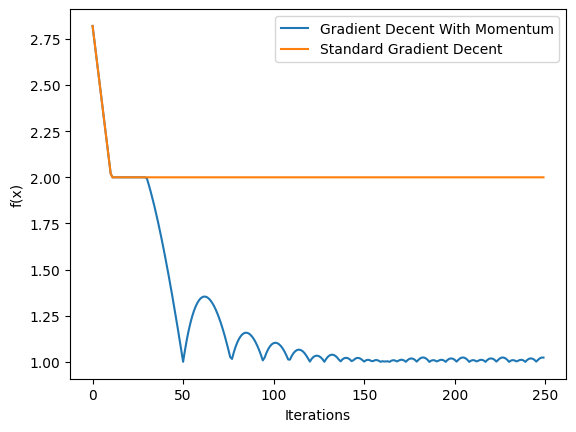

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(gd_wm.y_over_it, label="Gradient Decent With Momentum")
plt.plot(gd.y_over_it, label="Standard Gradient Decent")
plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

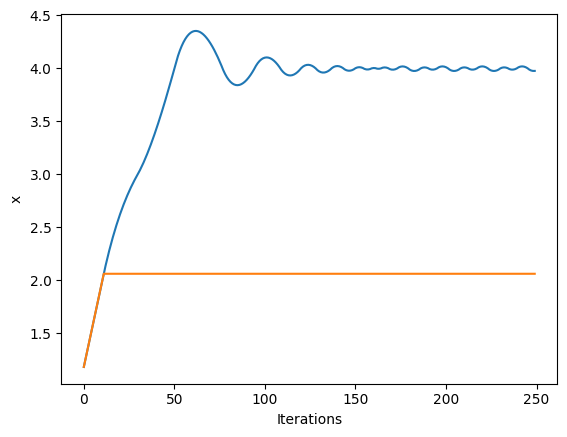

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(gd_wm.x_over_it, label="Gradient Decent With Momentum")
plt.plot(gd.x_over_it,  label="Standard Gradient Decent")
plt.xlabel("Iterations")
plt.ylabel("x")
plt.figure()